In [15]:
import math

def MSE(y, y_hat):
    squared_errors = [(a - b)**2 for (a, b) in zip(y, y_hat)]
    return sum(squared_errors) / len(squared_errors)

def MAE(y, y_hat):
    errors = [abs(a - b) for (a, b) in zip(y, y_hat)]
    return sum(errors)

def RMSD(y, y_hat):
    return (MSE(y, y_hat))**.5

def NRMSD(y, y_hat):
    return RMSD(y, y_hat) / (max(y)-min(y))

def MAPE(y, y_hat):
    errors = [abs((a-b)/(a+b)) if a + b != 0 else 0 for (a, b) in zip(y, y_hat)]
    return sum(errors) / len(errors)

x = [i for i in range(-100, 100, 2)]

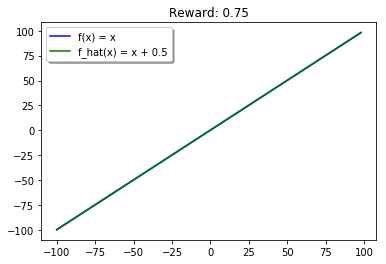

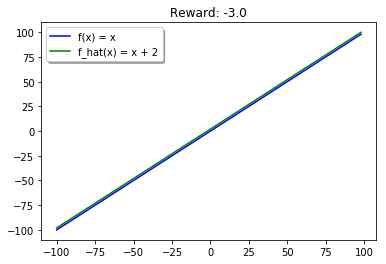

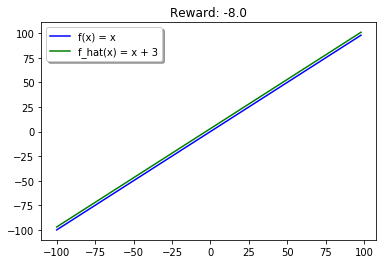

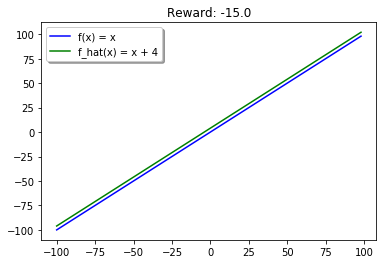

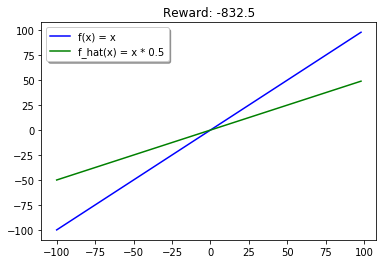

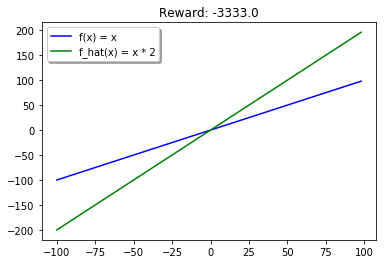

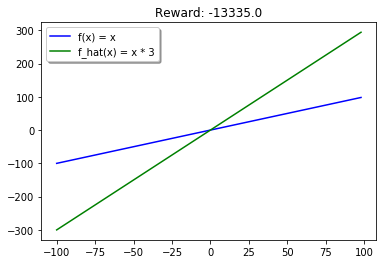

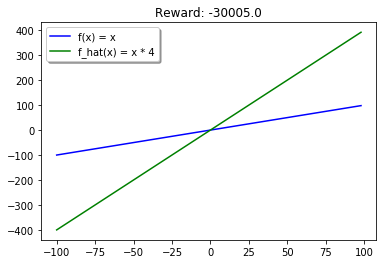

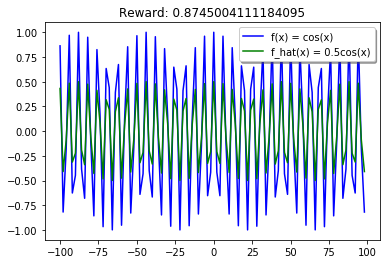

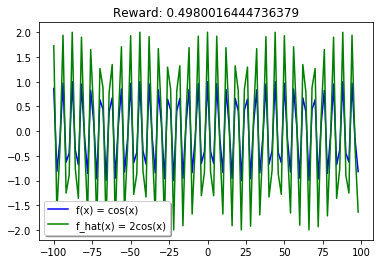

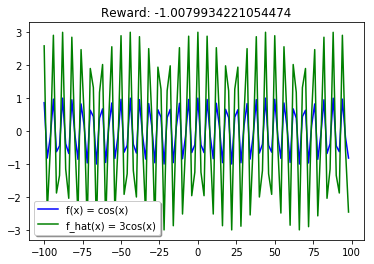

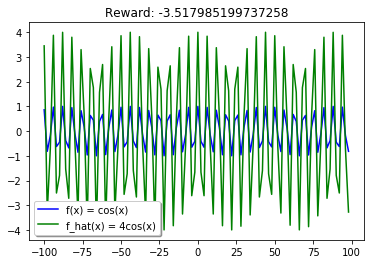

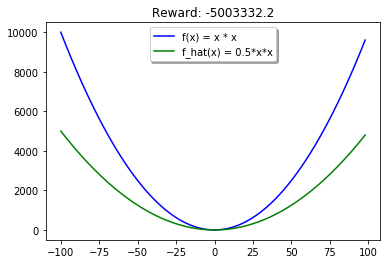

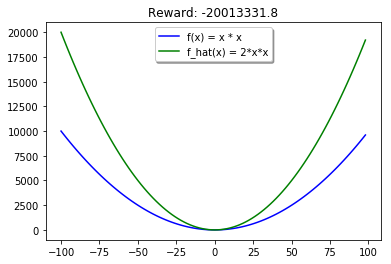

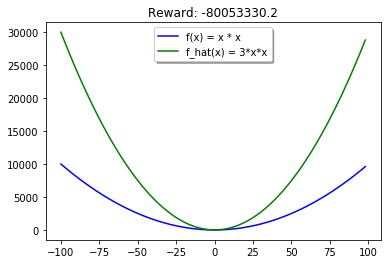

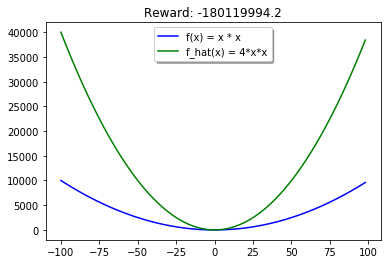

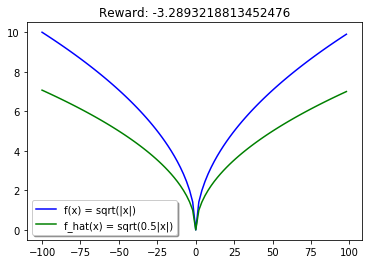

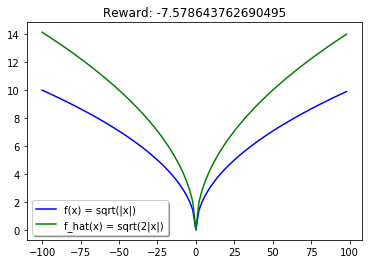

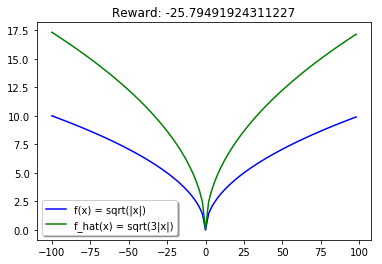

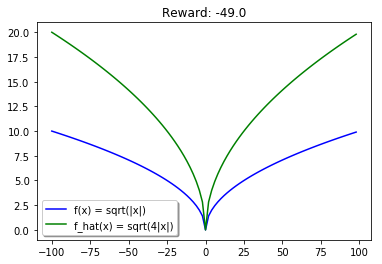

In [21]:
fs = [
    {
        "f": {"fn": lambda x: x, "str": "f(x) = x"}, 
        "f_hat": {"fn": lambda x, p: x+p, "str": lambda p: "f_hat(x) = x + {p}".format(p=p)}
    },
    {
        "f": {"fn": lambda x: x, "str": "f(x) = x"}, 
        "f_hat": {"fn": lambda x, p: x*p, "str": lambda p: "f_hat(x) = x * {p}".format(p=p)}
    },
    {
        "f": {"fn": lambda x: math.cos(x), "str": "f(x) = cos(x)"}, 
        "f_hat": {"fn": lambda x, p: p*math.cos(x), "str": lambda p: "f_hat(x) = {p}cos(x)".format(p=p)}
    },
    {
        "f": {"fn": lambda x: x*x, "str": "f(x) = x * x"}, 
        "f_hat": {"fn": lambda x, p: p*x*x, "str": lambda p: "f_hat(x) = {p}*x*x".format(p=p)}
    },
    {
        "f": {"fn": lambda x: math.sqrt(abs(x)), "str": "f(x) = sqrt(|x|)"}, 
        "f_hat": {"fn": lambda x, p: math.sqrt(p*abs(x)), "str": lambda p: "f_hat(x) = sqrt({p}|x|)".format(p=p)}
    }
]

ps = [.5, 2, 3, 4]

import matplotlib.pyplot as plt

fig_ct = 1

for pair in fs:
    f = pair["f"]["fn"]
    f_str = pair["f"]["str"]
    f_hat = pair["f_hat"]["fn"]
    f_hat_str = pair["f_hat"]["str"]
    y = [f(n) for n in x]
    for p in ps:
        y_hat = [f_hat(n, p) for n in x]
        loss = MSE(y, y_hat)
        reward = 1 - loss
        plt.figure(fig_ct)
        plt.plot(x, y, 'b', label=f_str)
        plt.plot(x, y_hat, 'g', label=f_hat_str(p))
        plt.legend(loc='best', shadow=True, fancybox=True)
        plt.title('Reward: {r}'.format(r=reward))
        fig_ct += 1
        
